In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df_carbon = pd.read_csv('Carbon_emission_data.csv')
df_carbon.head

<bound method NDFrame.head of       Country Transport Mode  Carbon Emission (kg/km)
0         USA          Metro                     1.82
1         USA      DieselCar                     1.97
2         USA      PetrolCar                     0.34
3         USA    ElectricCar                     1.00
4         USA        Bicycle                     0.01
..        ...            ...                      ...
65  Australia      Motorbike                     1.58
66  Australia        Scooter                     0.26
67  Australia           Tram                     1.51
68  Australia          Ferry                     0.38
69  Australia    RideSharing                     1.36

[70 rows x 3 columns]>

In [5]:
df_employee = pd.read_csv('Employee_transport_data.csv')
df_employee.head

<bound method NDFrame.head of     Employee Name    Country  Year  \
0            n360      India  2019   
1            n250  Australia  2018   
2            n499      India  2016   
3            n979      India  2018   
4             n65    Germany  2018   
..            ...        ...   ...   
995          n502  Australia  2017   
996          n865      India  2020   
997           n35      India  2010   
998          n135        USA  2020   
999           n97      India  2012   

                                        Transport Used  
0                                   Bus:18km, Tram:4km  
1                              Scooter:25km, Train:9km  
2             Motorbike:10km, Walking:27km, Train:17km  
3                 Train:20km, Ferry:28km, Walking:26km  
4                                        DieselCar:6km  
..                                                 ...  
995                             Bus:17km, Walking:19km  
996  Ferry:5km, HybridCar:9km, PetrolCar:18km, Bus:...  
997  Train:2km, Ferry:18km, RideSharing:19km, Petro...  
998   Bus:27km, PetrolCar:28km, Train:28km, Metro:18km  
999                                            Bus:3km  

[1000 rows x 4 columns]>

In [6]:
df_carbon.columns

Index(['Country', 'Transport Mode', 'Carbon Emission (kg/km)'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

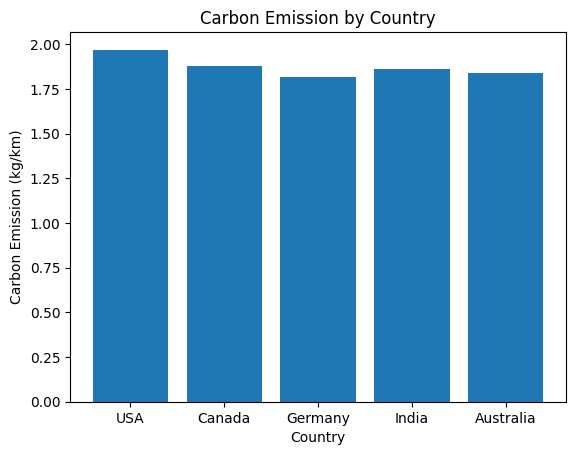

In [8]:
plt.bar(df_carbon['Country'],df_carbon['Carbon Emission (kg/km)'])
plt.xlabel('Country')
plt.ylabel('Carbon Emission (kg/km)')
plt.title('Carbon Emission by Country')
plt.show

In [9]:
df_employee.columns

Index(['Employee Name', 'Country', 'Year', 'Transport Used'], dtype='object')

In [10]:
df1 = df_carbon.groupby('Transport Mode').sum()
df1

,Country,Carbon Emission (kg/km)
Transport Mode,,
Bicycle,USACanadaGermanyIndiaAustralia,5.56
Bus,USACanadaGermanyIndiaAustralia,7.49
DieselCar,USACanadaGermanyIndiaAustralia,4.08
ElectricCar,USACanadaGermanyIndiaAustralia,6.08
Ferry,USACanadaGermanyIndiaAustralia,3.66
HybridCar,USACanadaGermanyIndiaAustralia,5.70
Metro,USACanadaGermanyIndiaAustralia,5.97
Motorbike,USACanadaGermanyIndiaAustralia,5.02
PetrolCar,USACanadaGermanyIndiaAustralia,2.54


<function matplotlib.pyplot.show(close=None, block=None)>

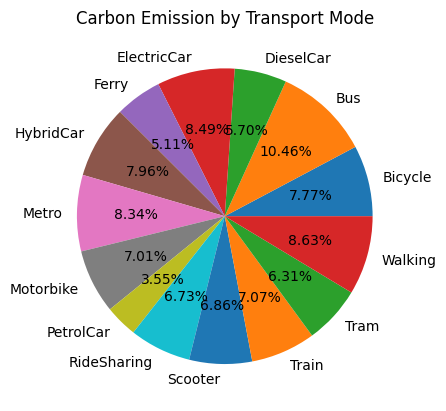

In [11]:
x = df1.index
y = df1['Carbon Emission (kg/km)']
plt.pie(y,labels=x,autopct='%1.2f%%')
plt.title('Carbon Emission by Transport Mode')
plt.show

In [17]:
print(df_employee['Employee Name'].nunique())

609


In [36]:
for i in df_carbon['Country'].unique():
  print(i)

USA
Canada
Germany
India
Australia


In [50]:
mode_usa,km_usa=[],[]
df1 = df_employee.loc[df_employee['Country'] == 'USA']
for i in df1['Transport Used']:
  k=i.split(',')
  for p in k:
    l=p.split(':')
    mode_usa.append(l[0])
    km_usa.append(l[1].rstrip('km'))


In [47]:
df2 = pd.DataFrame(mode_usa,km_usa,columns=['mode_usa','km_usa'])
df2.groupby('mode_usa').sum()

ValueError: Shape of passed values is (559, 1), indices imply (559, 2)

In [43]:
len(mode_usa)

559

In [52]:
dict1 = {}
for i in range(len(mode_usa)):
  if(mode_usa[i] in dict1):
    dict1[mode_usa[i]] += int(km_usa[i])
  else:
    dict1[mode_usa[i]] = int(km_usa[i])
dict1

for i in dict1:
  print(i,dict1[i])

RideSharing 148
 DieselCar 436
 Ferry 420
Bicycle 137
 ElectricCar 397
 Scooter 447
HybridCar 255
 RideSharing 483
 Metro 508
Metro 155
Train 209
Bus 192
 Bicycle 442
 Walking 420
Ferry 199
Motorbike 152
 Tram 187
 Bus 334
 PetrolCar 431
 Motorbike 389
DieselCar 259
Walking 192
Tram 272
ElectricCar 290
PetrolCar 199
 HybridCar 357
 Train 334
Scooter 271
